## Overview

### Main modules
   - core.    Core functionality
   - imgproc. Image Processing
   - imgcodecs. Image file reading and writing
   
   - videoio. Video I/O
   - highgui. High-level GUI
   - video. Video Analysis
   - calib3d. Camera Calibration and 3D Reconstruction
   - features2d. 2D Features Framework
   - objdetect. Object Detection
   - dnn. Deep Neural Network module
   - ml. Machine Learning
   - flann. Clustering and Search in Multi-Dimensional Spaces
   - photo. Computational Photography
   - stitching. Images stitching
   - gapi. Graph API

### Extra modules:



## Install Opencv with Python

To use the OpenCV library in python, we need to install these libraries as a prerequisite:

  - Numpy Library : The computer processes images in the form of a matrix for which NumPy is used and  OpenCV uses it in the background.
  - OpenCV python : OpenCV library previously it was cv but the updated version is cv2. It is used to manipulate images and videos.


In [1]:
import sys
# optional extend jupyter. then enable toc in Nbextensions Tab
# !{sys.executable} -m pip install jupyter_contrib_nbextensions -i https://pypi.tuna.tsinghua.edu.cn/simple/

# 1. opencv dependencies
!{sys.executable} -m pip install numpy matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple/

# 2. install opencv full package (contains both main modules and contrib/extra modules)
!{sys.executable} -m pip install  opencv-python  opencv-contrib-python -i https://pypi.tuna.tsinghua.edu.cn/simple/

#    or install opencv without build-in GUI support
# !{sys.executable} -m pip install opencv-python-headless opencv-contrib-python-headless -i https://pypi.tuna.tsinghua.edu.cn/simple/


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


## 1. Reading an imange

- Windows bitmaps – *.bmp, *.dib
- JPEG files – *.jpeg, *.jpg
- Portable Network Graphics – *.png 
- WebP – *.webp 
- Sun rasters – *.sr, *.ras 
- TIFF files – *.tiff, *.tif 
- Raster and Vector geospatial data supported by GDAL 

In [2]:
import cv2
image = cv2.imread('images/sjtu.jpeg')

h, w = image.shape[:2]

print(f"Height = {h}, Width = {w}, shape={image.shape}")

# show image using open cv
# cv2.imshow("image", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# image is numpy.ndarray 
type(image)

Height = 449, Width = 598, shape=(449, 598, 3)


numpy.ndarray

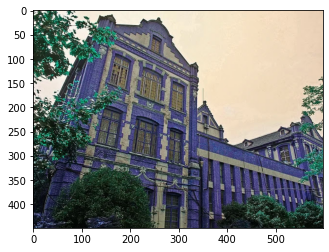

In [3]:
import matplotlib.pyplot as plt
plt.imshow(image)


## 2. process image

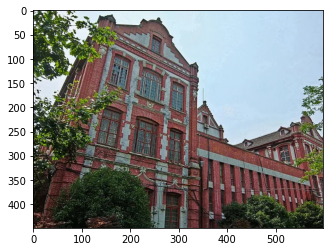

In [4]:
# Converting BGR color to RGB color format
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [5]:
# Extracting the RGB values of a pixel
(b,g,r) = image[30, 30]
print(f"r={r}, g={g}, b={b}")

b = image[30, 30, 0]
print(f"b={b}")


r=54, g=72, b=50
b=50


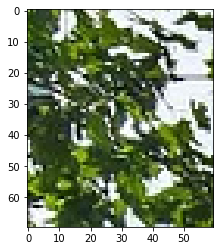

In [6]:
# Extracting the Region of Interest (ROI)
# note: [y1:y2, x1:x2]
roi = rgb_image[10:80, 30:90]
plt.imshow(roi)


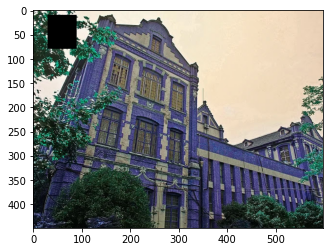

In [7]:
roi = image[10:80, 30:90]
# note: [y1:y2, x1:x2]
roi[:,:] = 0
plt.imshow(image)

image shape is (200, 400, 3)


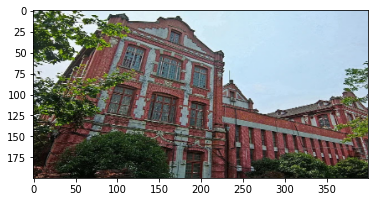

In [8]:
# Resizing the Image
image2 = cv2.resize(rgb_image, (400, 200))
print(f"image shape is {image2.shape}")
plt.imshow(image2)

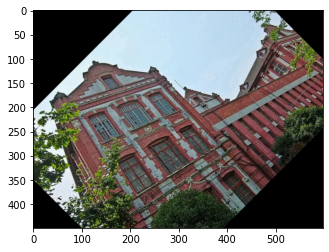

In [9]:
# Rotating the Image
h, w = rgb_image.shape[:2]
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, 45, 1.0)  # center, angle, scale
rotated_image = cv2.warpAffine(rgb_image, matrix, (w, h))
plt.imshow(rotated_image)

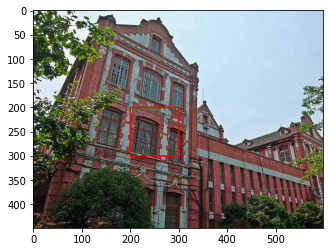

In [10]:
# Drawing a Rectangle
image_to_be_draw = rgb_image.copy()
  
# Using the rectangle() function to create a rectangle.
image_drawed = cv2.rectangle(
    image_to_be_draw, 
    (200, 200), (300, 300), # p1, p2
    (255, 0, 0),  # color, (r,g,b)
    2 # thickness
)

plt.imshow(image_drawed)

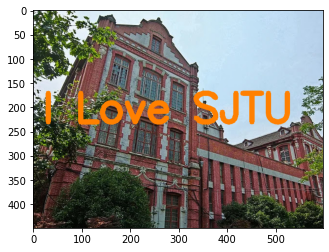

In [11]:
# Displaying text
image_to_be_texed = rgb_image.copy()
image_texed = cv2.putText(
    image_to_be_texed,
    'I Love SJTU',
    (20, 230),  # position (x, y)
    cv2.FONT_HERSHEY_SIMPLEX, # font
    2.8, # scale
    (255, 128, 0), # color
    10 # thicknell
)
plt.imshow(image_texed)

## 3. Save result

In [12]:
# Save file
image_to_be_saved = cv2.cvtColor(image_texed, cv2.COLOR_RGB2BGR)
cv2.imwrite("images/file-saved.jpg",image_to_be_saved)

True

## 3d image file

```python
    # install simple itk
    !{sys.executable} -m pip install numpy SimpleITK -i https://pypi.tuna.tsinghua.edu.cn/simple/

    # 1. load image
    import SimpleITK as sitk
    itk_img = sitk.ReadImage('images/3d-image.nii.gz')
    img = sitk.GetArrayFromImage(itk_img)

    print("img shape:",img.shape, type(img))

    # 2. process image
    fig, axes = plt.subplots(3,3, figsize=(8,8))
    for i,ax in enumerate(axes.flat):
        ax.imshow(img[:,:,i])


    ## 3. save 
    out = sitk.GetImageFromArray(img)
    # # out.SetSpacing(itk_img.GetSpacing())
    # # out.SetOrigin(itk_img.GetOrigin())
    sitk.WriteImage(out,'images/3d-image-save.nii.gz')
```


## Other Resources
opencv document https://docs.opencv.org/4.6.0/